# Some graph tools

In [1]:
import numpy as np
import networkx as nx
from nomhsms.spectrum import Spectrum
from graph import GraphMetric, GraphVis
import nomhsms.draw as draw

In [2]:
spec = Spectrum.read_csv('sample2.txt').assign(rel_error=0.25).drop_unassigned().calc_mass()

calculate graph metric for TMDS

In [3]:
table = GraphMetric(spec).get_graph_table()
table.sort_values(by='max_chain', ascending=False).head()

100%|██████████| 51/51 [00:04<00:00, 11.16it/s]


,mass,intensity,assign,C,H,O,N,calc_mass,nodes,chains,max_chain,median_chain
12,14.015650,0.684301,True,1.0,2.0,0.0,0.0,14.015650,2872,330,21,6.0
20,27.994915,0.660852,True,1.0,0.0,1.0,0.0,27.994915,2825,367,16,6.0
14,15.994915,0.650272,True,0.0,0.0,1.0,0.0,15.994915,2847,399,14,6.0
2,2.015650,0.657707,True,0.0,2.0,0.0,0.0,2.015650,2847,381,14,6.0
9,12.000000,0.657707,True,1.0,0.0,0.0,0.0,12.000000,2832,373,14,6.0


default dif table

In [4]:
GraphVis.gen_diftable()

,C,H,O,calc_mass,names,color
0,1,2,0,14.015650,CH2,#08ff00
1,1,0,1,27.994915,CO,#0010ff
2,1,0,2,43.989830,CO2,#ff0018


generate visualization for graph
open sample.html to watch
it is take a lot of time to calculate

In [5]:
spec_graph = GraphVis.generate(spec)
spec_graph.to_gml('sample1.gml')

custon diftabe

In [6]:
data = [ [1,2,1],
        [1,0,2],
        [0,2,1]]

d = GraphVis.gen_diftable(count = data)

gen visualizatiob with custom graph table

In [7]:
spec_graph = GraphVis.generate(spec, d)
spec_graph.to_gml('sample2.gml')

Find separate cluster in graph

In [8]:
gr = []
for c in nx.connected_components(spec_graph.G.to_undirected()):
    gr.append(spec_graph.G.to_undirected().subgraph(c).copy())

for g in gr:
    print(len(list(g.nodes)))

1077
1046
344
334
2
3
2
5
31
7
4
11
2
2
2
17
2
2
3
3
5
4
9
3
7
2
6
4
3
3
4
24
2
3
3
3
4
2
14
3
3
2
3
5
2
2
2
2
2
6
2
3
3
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
3
2
2
2
2


In [9]:
mas = np.array(list(gr[0].nodes))
mas = mas.astype(float)

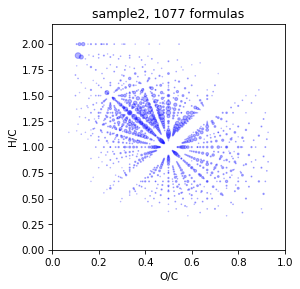

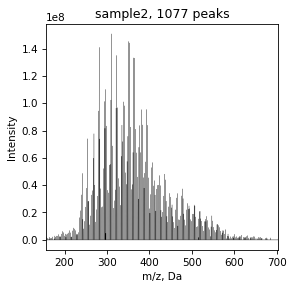

In [10]:
mas = np.array(list(gr[0].nodes))
mas = mas.astype(float)

s = spec.copy().drop_unassigned()

s.table = s.table[s.table['calc_mass'].isin(mas)]
draw.vk(s)
draw.spectrum(s)

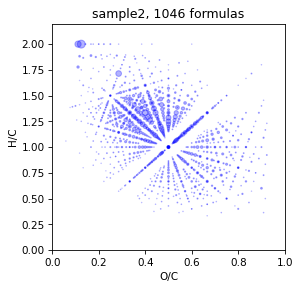

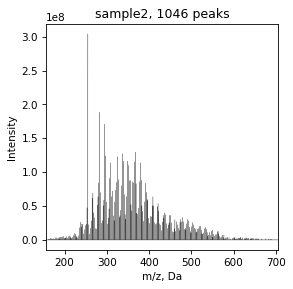

In [11]:
mas = np.array(list(gr[1].nodes))
mas = mas.astype(float)

s = spec.copy().drop_unassigned()

s.table = s.table[s.table['calc_mass'].isin(mas)]
draw.vk(s)
draw.spectrum(s)